In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv


In [2]:
df = pd.read_csv('/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


# Data Understanding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

**Columns meaning need to know**
* Anaemia: Decrease of red blood cells or hemoglobin
* Creatinine phosphokinase: Level of the CPK enzyme in the blood
* Ejection fraction: Percentage of blood leaving the heart at each contraction
* Serum creatinine: Waste product in your blood that comes from your muscles
* Serum sodium: The concentration of sodium in the blood

In [5]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
continous_variables = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 
                       'serum_creatinine', 'serum_sodium', 'time']

In [7]:
df[continous_variables].describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


In [8]:
df['anaemia'].value_counts()

anaemia
0    170
1    129
Name: count, dtype: int64

In [9]:
df['diabetes'].value_counts()

diabetes
0    174
1    125
Name: count, dtype: int64

In [10]:
df['high_blood_pressure'].value_counts()

high_blood_pressure
0    194
1    105
Name: count, dtype: int64

In [11]:
df['sex'].value_counts()

sex
1    194
0    105
Name: count, dtype: int64

In [12]:
df['smoking'].value_counts()

smoking
0    203
1     96
Name: count, dtype: int64

In [13]:
df['DEATH_EVENT'].value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

**Finding Correlation between variables**

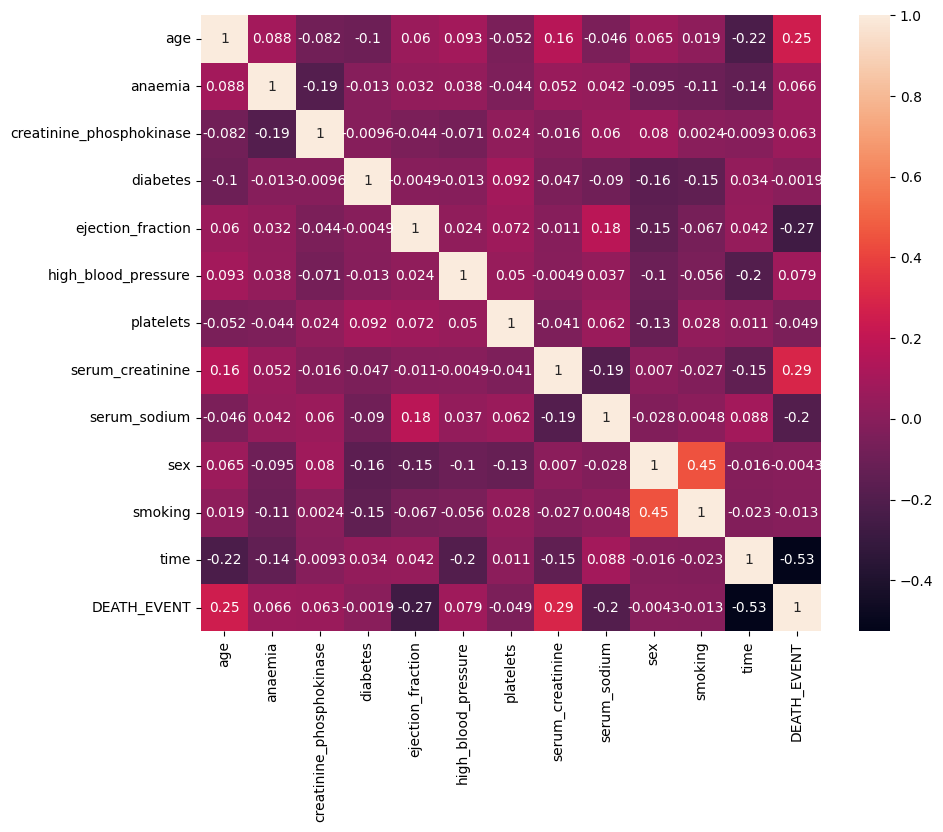

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(),annot=True)
plt.show()

Time is negatively correlated with death event more than any other factor.
So, we'll not consider it in our model

# Data Preprocessing

**Checking empty values**

In [15]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

**Checking Duplicate values**

In [16]:
df.duplicated().sum()

0

**Deleting time bcz of correlation**

In [17]:
df.drop(columns=['time'], inplace=True)

**X & Y**

In [18]:
x = df[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking']]
y = df['DEATH_EVENT']

**Finding best Random State**

In [19]:
train=[]
test=[]
cv=[]
for i in range(0,101):
    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=i)
    
    from sklearn.linear_model import LogisticRegression
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    
    train_pred=lr.predict(x_train)
    test_pred=lr.predict(x_test)
    
    from sklearn.metrics import accuracy_score
    train.append(accuracy_score(y_train,train_pred))
    test.append(accuracy_score(y_test,test_pred))
    
    from sklearn.model_selection import cross_val_score
    cv.append(cross_val_score(lr,x_train,y_train,cv=5,scoring='accuracy').mean())
    
em = pd.DataFrame({'Train':train, 'Test':test, 'CV':cv})
gm = em[(abs(em['Train']-em['Test'])<=0.05) & (abs(em['Test']-em['CV'])<=0.05)]
rs = gm[gm['CV']==gm['CV'].max()].index.to_list()[0]
print('Best Random State:',rs)

Best Random State: 47


**Train Test Split**

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=47)

**Feature Scaling**

In [21]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(x_train,y_train)

train_pred=reg.predict(x_train)
test_pred=reg.predict(x_test)
#Evaluation
print('Train Accuracy:',accuracy_score(y_train,train_pred))
print('Test Accuracy:',accuracy_score(y_test,test_pred))

print('CV score:',cross_val_score(reg,x_train,y_train,cv=5).mean())

Train Accuracy: 0.7949790794979079
Test Accuracy: 0.65
CV score: 0.7452127659574468


**Confusion Matrix**

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,test_pred)
cm

array([[30,  4],
       [17,  9]])

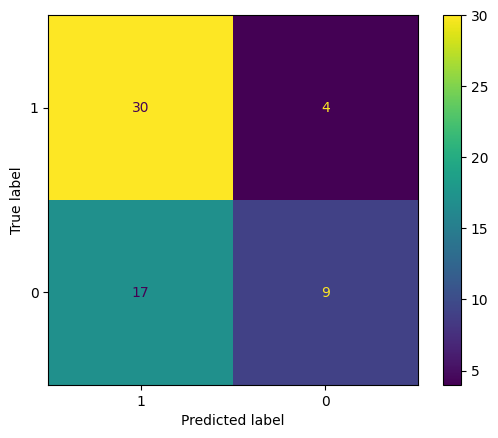

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm,display_labels=df['DEATH_EVENT'].unique()).plot()
plt.show()

**Classification Report**

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.64      0.88      0.74        34
           1       0.69      0.35      0.46        26

    accuracy                           0.65        60
   macro avg       0.67      0.61      0.60        60
weighted avg       0.66      0.65      0.62        60



**Receiver Operating Characteristic Curve & Area Under Curve**

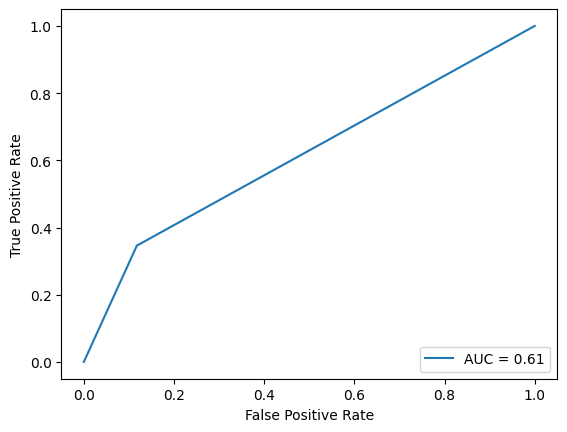

In [26]:
from sklearn.metrics import auc,roc_curve,RocCurveDisplay
fpr, tpr, thresholds = roc_curve(y_test,test_pred)
roc_auc = auc(fpr,tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.show()

**Area Under Curve Score**

In [27]:
from sklearn.metrics import roc_auc_score
print('AUC Score:',roc_auc_score(y_test,test_pred))

AUC Score: 0.6142533936651584


# KNN

**HpyerParameter Tuning**(for finding best value of number of neighbors)

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
estimator=KNeighborsClassifier()
param_grid={'n_neighbors':list(range(1,30))}

model=GridSearchCV(estimator,param_grid,scoring='accuracy')
model.fit(x_train,y_train)
model.best_params_

{'n_neighbors': 15}

**Modeling**

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train,y_train)

train_pred=knn.predict(x_train)
test_pred=knn.predict(x_test)
#Evaluation
print('Train Accuracy:',accuracy_score(y_train,train_pred))
print('Test Accuracy:',accuracy_score(y_test,test_pred))

print('CV score:',cross_val_score(knn,x_train,y_train,cv=5,scoring='accuracy').mean())

Train Accuracy: 0.7364016736401674
Test Accuracy: 0.5833333333333334
CV score: 0.7281028368794327


**Confusion Matrix**

In [30]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_test,test_pred)
cm

array([[34,  0],
       [25,  1]])

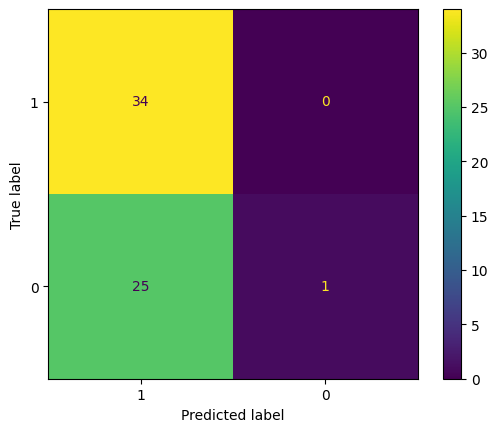

In [31]:
ConfusionMatrixDisplay(cm,display_labels=df['DEATH_EVENT'].unique()).plot()
plt.show()

**Classification Report**

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.58      1.00      0.73        34
           1       1.00      0.04      0.07        26

    accuracy                           0.58        60
   macro avg       0.79      0.52      0.40        60
weighted avg       0.76      0.58      0.45        60



**Receiver Operating Characteristic Curve & Area Under Curve**

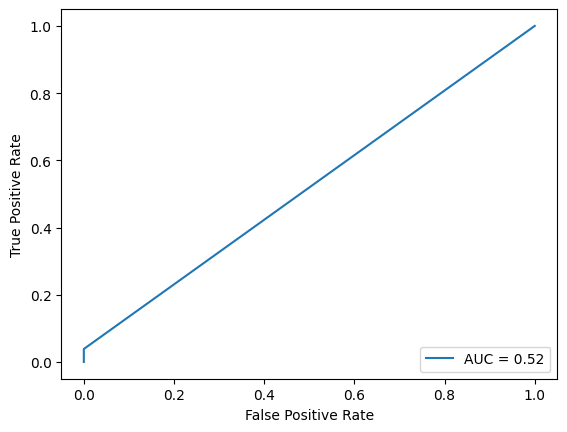

In [33]:
from sklearn.metrics import auc,roc_curve,RocCurveDisplay
fpr, tpr, thresholds = roc_curve(y_test,test_pred)
roc_auc = auc(fpr,tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.show()

**Area Under Curve Score**

In [34]:
from sklearn.metrics import roc_auc_score
print('AUC Score:',roc_auc_score(y_test,test_pred))

AUC Score: 0.5192307692307693


# SVM

**HyperParameter Tuning**(for finding best value of C and kernel)

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
estimator=SVC()
param_grid = {'C':list(range(1,100)), 'kernel':['linear','polynomial','rbf','sigmoid']}
model=GridSearchCV(estimator, param_grid, cv=5, scoring='accuracy')
model.fit(x_train,y_train)
model.best_params_

{'C': 2, 'kernel': 'sigmoid'}

**Modeling**

In [36]:
svm=SVC(C=2,kernel='sigmoid')
svm.fit(x_train,y_train)

train_pred=svm.predict(x_train)
test_pred=svm.predict(x_test)
#Evaluation
print('Train Accuracy:',accuracy_score(y_train,train_pred))
print('Test Accuracy:',accuracy_score(y_test,test_pred))

print('CV score:',cross_val_score(svm,x_train,y_train,cv=5,scoring='accuracy').mean())

Train Accuracy: 0.7322175732217573
Test Accuracy: 0.7
CV score: 0.7786347517730496


**Confusion Matrix**

In [37]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_test,test_pred)
cm

array([[29,  5],
       [13, 13]])

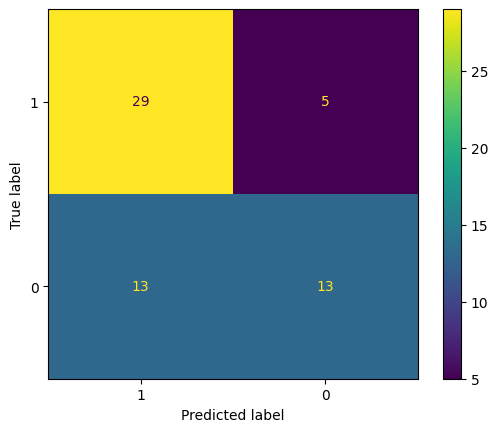

In [38]:
ConfusionMatrixDisplay(cm,display_labels=df['DEATH_EVENT'].unique()).plot()
plt.show()

**Classification Report**

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.69      0.85      0.76        34
           1       0.72      0.50      0.59        26

    accuracy                           0.70        60
   macro avg       0.71      0.68      0.68        60
weighted avg       0.70      0.70      0.69        60



**Receiver Operating Characteristic Curve** & **Area Under Curve**

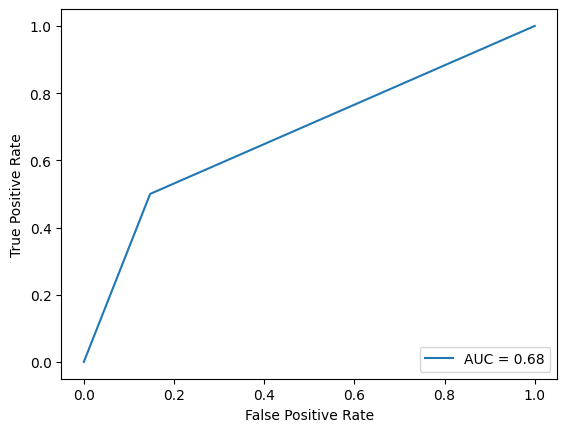

In [40]:
from sklearn.metrics import auc,roc_curve,RocCurveDisplay
fpr, tpr, thresholds = roc_curve(y_test,test_pred)
roc_auc = auc(fpr,tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.show()

**Area Under Curve Score**

In [41]:
from sklearn.metrics import roc_auc_score
print('AUC Score:',roc_auc_score(y_test,test_pred))

AUC Score: 0.676470588235294


# Decision Tree

**HyperParameter Tuning** (to find whether to use entropy or gini)

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
estimator=DecisionTreeClassifier()
param_grid={'criterion':['gini','entropy']}
model=GridSearchCV(estimator, param_grid, cv=5, scoring='accuracy')
model.fit(x_train,y_train)
model.best_params_

{'criterion': 'entropy'}

**Modeling**

In [43]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train,y_train)

train_pred=dt.predict(x_train)
test_pred=dt.predict(x_test)
#Evaluation
print('Train Accuracy:',accuracy_score(y_train,train_pred))
print('Test Accuracy:',accuracy_score(y_test,test_pred))

print('CV score:',cross_val_score(dt,x_train,y_train,cv=5,scoring='accuracy').mean())

Train Accuracy: 1.0
Test Accuracy: 0.65
CV score: 0.7236702127659574


**Confusion Matrix**

In [44]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_test,test_pred)
cm

array([[25,  9],
       [12, 14]])

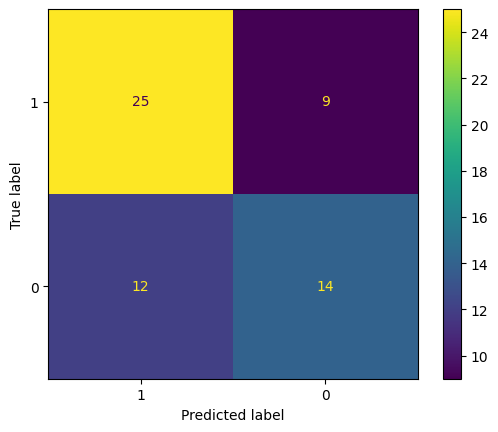

In [45]:
ConfusionMatrixDisplay(cm,display_labels=df['DEATH_EVENT'].unique()).plot()
plt.show()

**Classification Report**

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.68      0.74      0.70        34
           1       0.61      0.54      0.57        26

    accuracy                           0.65        60
   macro avg       0.64      0.64      0.64        60
weighted avg       0.65      0.65      0.65        60



**Receiver Operating Characteristic Curve & Area Under Curve**

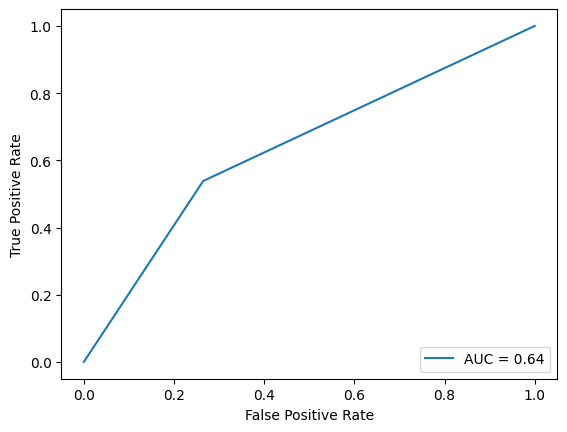

In [47]:
from sklearn.metrics import auc,roc_curve,RocCurveDisplay
fpr, tpr, thresholds = roc_curve(y_test,test_pred)
roc_auc = auc(fpr,tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.show()

**Area Under Curve Score**

In [48]:
from sklearn.metrics import roc_auc_score
print('AUC Score:',roc_auc_score(y_test,test_pred))

AUC Score: 0.6368778280542986


# Random Forest Search

**HyperParameter Tunnig** (for finding best estimators)

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier(random_state=0)
param_grid = {'n_estimators':list(range(1,100))}

grid = GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)
grid.best_params_

{'n_estimators': 83}

**Modeling**

In [50]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=83)
rfc.fit(x_train,y_train)

train_pred = rfc.predict(x_train)
test_pred = rfc.predict(x_test)

from sklearn.metrics import accuracy_score
print('Train Accuracy:',accuracy_score(y_train,train_pred))
print('Test Accuracy:',accuracy_score(y_test,test_pred))

from sklearn.model_selection import cross_val_score
print('CV score:',cross_val_score(rfc,x_train,y_train,cv=5,scoring='accuracy').mean())

Train Accuracy: 1.0
Test Accuracy: 0.65
CV score: 0.7658687943262412


**Confusion Matrix**

In [51]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_test,test_pred)
cm

array([[28,  6],
       [15, 11]])

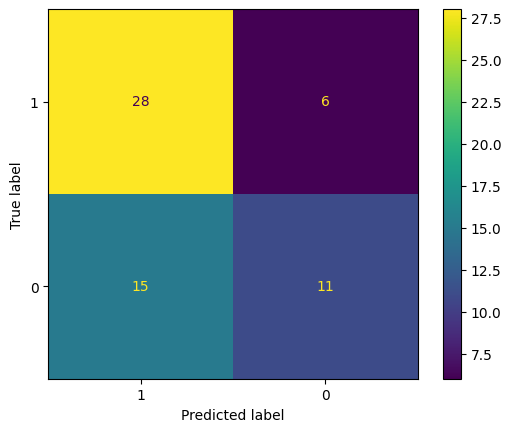

In [52]:
ConfusionMatrixDisplay(cm,display_labels=df['DEATH_EVENT'].unique()).plot()
plt.show()

**Classification Report**

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.65      0.82      0.73        34
           1       0.65      0.42      0.51        26

    accuracy                           0.65        60
   macro avg       0.65      0.62      0.62        60
weighted avg       0.65      0.65      0.63        60



**Receiver Operating Characteristic Curve & Area Under Curve**

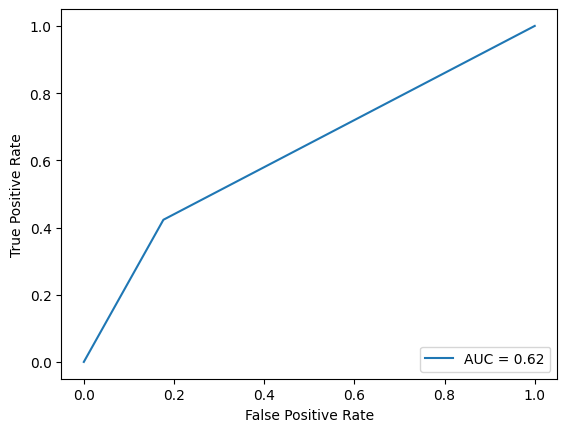

In [54]:
from sklearn.metrics import auc,roc_curve,RocCurveDisplay
fpr, tpr, thresholds = roc_curve(y_test,test_pred)
roc_auc = auc(fpr,tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.show()

**Area Under Curve Score**

In [55]:
from sklearn.metrics import roc_auc_score
print('AUC Score:',roc_auc_score(y_test,test_pred))

AUC Score: 0.6233031674208145
